<a href="https://colab.research.google.com/github/kodingkin/Word-to-PDF/blob/main/lab6_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sklearn.linear_model

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
dir = '/content/drive/MyDrive/Colab Notebooks'
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


Part II question one


In [ ]:
# Import data
gmsl = np.loadtxt(r'/content/drive/MyDrive/Colab Notebooks/gmsl.dat')
time_years = gmsl[0::,0]
gmsl_in_mm = gmsl[0::,1]
T = 1

In [ ]:
# Make the guess
initial_S0 = 0 
initial_R = 22  
initial_A = 1   
initial_o = 1 
initial_guess = [initial_S0, initial_R, initial_A1,initial_o]

In [ ]:
# Define the function for equation
def curve(t,S0,R,A,o):
  S = S0 + R*t + A*np.sin((2*np.pi/T)*t+o) 
  return S
# Do the curve fit  
popt, pcov = curve_fit(curve, time_years, gmsl_in_mm, initial_guess)

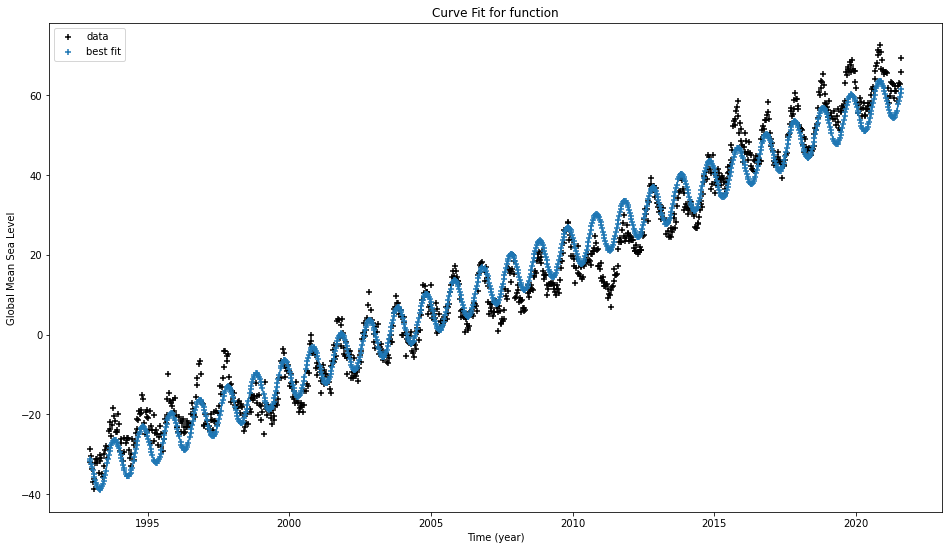

In [ ]:
# Plot the graph
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)
plt.plot((time_years), (curve(time_years, *popt)))
plt.scatter(time_years, gmsl_in_mm, c='k', marker='+', label="data")
plt.scatter(time_years, curve(time_years, *popt), marker='+', label="best fit")
plt.title("Curve Fit for function")
ax.set_xlabel("Time (year)") 
ax.set_ylabel("Global Mean Sea Level") 
plt.legend(loc="best") 

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'Prediction')]

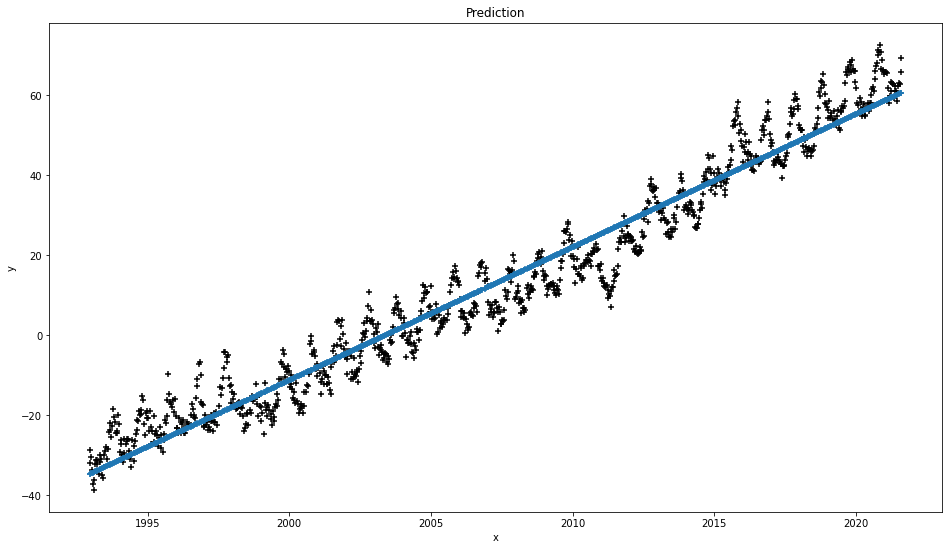

In [ ]:
# Bonus
# Do the linear regression

# Define function for equation
def straight(t,S0,R,A1,A2):
  S = S0 + R*t + A1*np.sin((2*np.pi/T)*t) +A2*np.cos((2*np.pi/T)*t)
  return S

# Do the linear regression
time = time_years.reshape(-1, 1)
gmsl_na = gmsl_in_mm.reshape(-1, 1)
reg = sklearn.linear_model.LinearRegression().fit(time,gmsl_na)

# Plot the graph
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)
_ = np.array([[time.min()], [time.max()]])
ax.plot(_, reg.predict(_))
ax.scatter(time, gmsl_na, c='k', marker='+')
ax.scatter(time, reg.predict(time), marker='+')
ax.set(title='Prediction', xlabel='x', ylabel='y')

In [ ]:
print(f'Estimated values of R is {popt[1]:.6f} mm/year.')
print(f'The standard deviation of that of R is {np.sqrt(pcov[1, 1]):.6f} mm/year.')
print(time_years[0])
print(time_years[-1])

Estimated values of R is 3.326803 mm/year.
The standard deviation of that of R is 0.017694 mm/year.
1992.96
2021.598


Estimated values of R is 3.326803 mm/year.
The standard deviation of that of R is 0.017694 mm/year.
The duration is from 1992 to 2021

In [ ]:
TP,FP,FN = 343,1131,(568-343)
print(FN)
def prec(TP,FP,FN):
  return (TP/(TP+FP))
def rec(TP,FP,FN):
  return (TP/(TP+FN))
def f1(prec,rec):
  return (2*prec*rec)/(prec+rec)
print(prec(TP,FP,FN),rec(TP,FP,FN),f1(prec(TP,FP,FN),rec(TP,FP,FN)))